# Name: THARA DEVI P M
# Task - 2 : COLOR IDENTIFICATION IN IMAGES

#### Step1: Importing the Libraries

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os as os


#### Step2: Reading the given Images

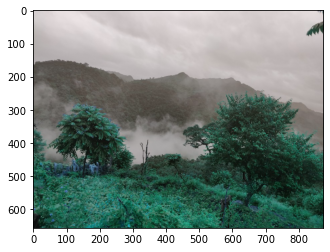

In [11]:
image = cv2.imread("C:\\Users\\thara\\Downloads\\images\\sample_image.jpg")
plt.imshow(np.real(image))
plt.show()


#### Step3: Identifying the Type of input and Shape of Image Data

In [12]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))


The type of this input is <class 'numpy.ndarray'>
Shape: (656, 875, 3)


## Note:

From the Above image we can able to see that the image has different colors compared from the original image. This is because of the Default OpenCV reads the color of the images in the order of 'Blue - Green - Red' i.e. BGR to the order of 'Red - Green - Blue' i.e. RGB 

#### Step4: Convering the BGR to RGB

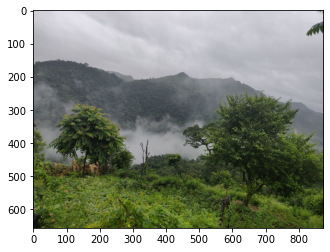

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


## Note:

If we want to convert the RGB Color to Black & White Images. In such cases, we can express images as Gray.
Now we need to convert RGB image to grayscale becuase in RGB image we have 3 channel so computer need more time and memory to understand what's inside image but with grayscale we only left with 2d array so it's easy for computer to understand



#### Step5: Convering the Images to the Gray Scale

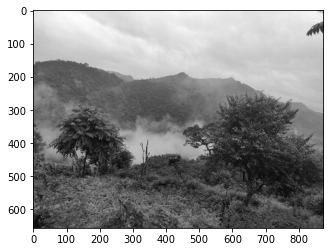

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()


## Note:

If we want to resize the Images to a certain size because we have the images that are huge in size and different from DimensionS.

#### Step6: Resizing the Images

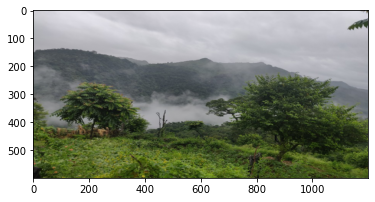

In [15]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.show()


#### Step7: Lets We can Start Color Identification

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


## Note:

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart. I have combined all the steps in two method.



#### Step8: Defining the Method to get the Images & Conversion from BGR - to - RGB

In [17]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


#### Step-9: Defining method along with K_Means Algorithm

In [18]:
def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


#### Step-10: Calling Above Two Functions inside each other

[array([151.39957105, 153.16975871, 155.35560322]),
 array([61.71754196, 75.86694449, 34.70135611]),
 array([81.10053113, 87.96362429, 88.63788525]),
 array([113.63717161, 118.84720952, 115.64601577]),
 array([206.81350929, 206.49087671, 213.99951212]),
 array([ 97.16438882, 113.91139435,  47.37853194]),
 array([31.82714545, 41.20382866, 20.77013168]),
 array([182.88047331, 183.31327884, 190.35289242])]

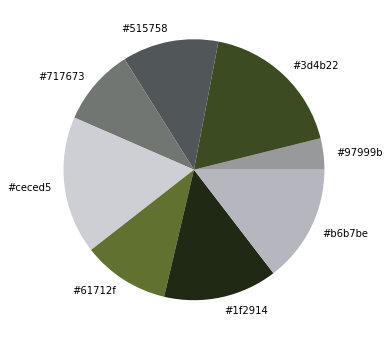

In [20]:
get_colors(get_image("C:\\Users\\thara\\Downloads\\images\\sample_image.jpg"), 8, True)

#### Step-11: Search images using Color

From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match. We first get all the images and store them in the "images" variable.


In [21]:
IMAGE_DIRECTORY = "C:\\Users\\thara\\Downloads\\images"

COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))


#### Step-12: Visualization of Data

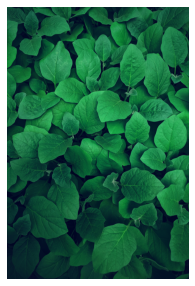

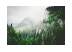

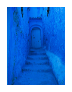

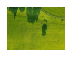

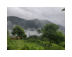

In [22]:
plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()

#### Step-13: Function for finding matches by using top 10 colors in images

I define the function below. I will try to match with the top 10 colors of the image. It is highly possible that there will be no extact match for the hex codes, thus we calculate the similarity between the chosen color and the colors of the image. We keep a threshold value such that if the difference between the chosen color and any of the selected colors is less than that threshold, we declare it as a match. Hex values or RGB values cannot be directly compared so I first convert them to a device independant and color uniform space. We use "RGB2LAB" to convert the values and then find the difference using "deltaE_cie76". The method calculates the difference between all top 5 colors of the image and the selected color and if atleast one is below the threshold, we show the image.

In [23]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image


#### Step-14: Function for selection of images (Match/Mismatch)

In [24]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1


#### Step-15:Calling above methods and visualizing results

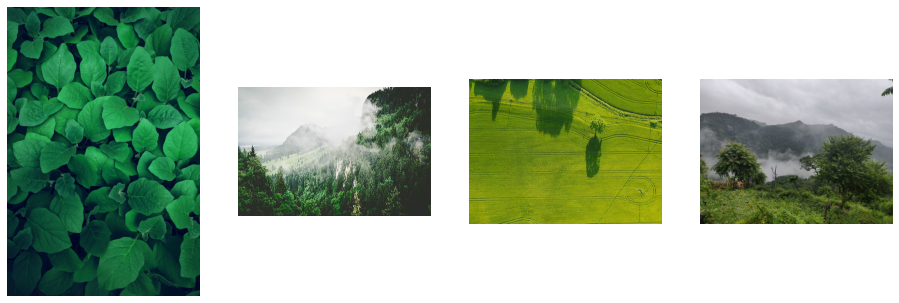

In [26]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)
plt.show()

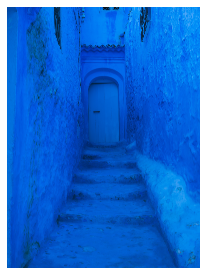

In [27]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)


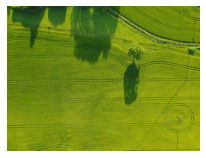

In [28]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)


## Conclusion:

In this project i have used the KMeans Algorithm to extract colors from an Image and then I used the RGB Values of Colors to identify images from a collection that have that color in them.

## Thank You!
### Done By:Thara Devi P M